In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as pl
import seaborn as sns

In [4]:
data=pd.read_csv("D:/Data/cetpa_ml/logistic case study life survival prediction.csv")
data.head(10)

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,211.3375,S
1,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,151.5500,S
2,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,151.5500,S
3,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,151.5500,S
4,1,1,"Anderson, Mr. Harry",male,48.0,0,0,26.5500,S
5,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,0.0000,S
6,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,51.4792,S
7,1,0,"Astor, Col. John Jacob",male,47.0,1,0,227.5250,C
8,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,227.5250,C
9,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,69.3000,C


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1257 non-null   int64  
 1   survived  1257 non-null   int64  
 2   name      1257 non-null   object 
 3   sex       1257 non-null   object 
 4   age       996 non-null    float64
 5   sibsp     1257 non-null   int64  
 6   parch     1257 non-null   int64  
 7   fare      1257 non-null   float64
 8   embarked  1257 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 88.5+ KB


In [6]:
data.shape

(1257, 9)

In [9]:
data.describe()

,pclass,survived,age,sibsp,parch,fare
count,1257.000000,1257.000000,996.000000,1257.000000,1257.000000,1257.000000
mean,2.310263,0.382657,29.070783,0.501989,0.377884,32.720896
std,0.831791,0.486229,12.819750,1.056616,0.863035,51.127788
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.400000
75%,3.000000,1.000000,37.000000,1.000000,0.000000,31.000000
max,3.000000,1.000000,60.000000,8.000000,9.000000,512.329200


<AxesSubplot:>

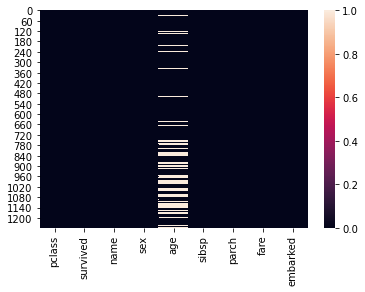

In [10]:
sns.heatmap(data.isnull())

In [14]:
data.isnull().sum()

pclass        0
survived      0
name          0
sex           0
age         261
sibsp         0
parch         0
fare          0
embarked      0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

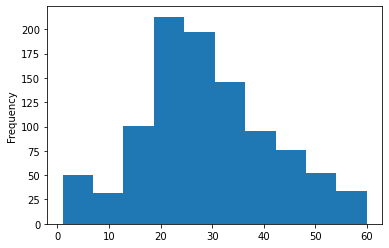

In [15]:
data["age"].plot.hist()

In [16]:
data["age"].fillna(data["age"].mean(),inplace=True)

In [17]:
data.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [18]:
data.pop("name")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1257 non-null   int64  
 1   survived  1257 non-null   int64  
 2   sex       1257 non-null   object 
 3   age       1257 non-null   float64
 4   sibsp     1257 non-null   int64  
 5   parch     1257 non-null   int64  
 6   fare      1257 non-null   float64
 7   embarked  1257 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 78.7+ KB


In [22]:
gender=pd.get_dummies(data["sex"],drop_first=True)
gender.head(10)

,male
0,0
1,0
2,1
3,0
4,1
5,1
6,0
7,1
8,0
9,0


In [23]:
Emb=pd.get_dummies(data["embarked"],drop_first=True)
Emb.head(10)

,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,0
8,0,0
9,0,0


In [24]:
data=pd.concat((data,gender,Emb),axis=1)
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,male,Q,S
0,1,1,female,29.0,0,0,211.3375,S,0,0,1
1,1,0,female,2.0,1,2,151.5500,S,0,0,1
2,1,0,male,30.0,1,2,151.5500,S,1,0,1
3,1,0,female,25.0,1,2,151.5500,S,0,0,1
4,1,1,male,48.0,0,0,26.5500,S,1,0,1


In [25]:
data=data.drop(["sex","embarked"],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1257 non-null   int64  
 1   survived  1257 non-null   int64  
 2   age       1257 non-null   float64
 3   sibsp     1257 non-null   int64  
 4   parch     1257 non-null   int64  
 5   fare      1257 non-null   float64
 6   male      1257 non-null   uint8  
 7   Q         1257 non-null   uint8  
 8   S         1257 non-null   uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 62.7 KB


In [26]:
data.head(10)

,pclass,survived,age,sibsp,parch,fare,male,Q,S
0,1,1,29.0,0,0,211.3375,0,0,1
1,1,0,2.0,1,2,151.5500,0,0,1
2,1,0,30.0,1,2,151.5500,1,0,1
3,1,0,25.0,1,2,151.5500,0,0,1
4,1,1,48.0,0,0,26.5500,1,0,1
5,1,0,39.0,0,0,0.0000,1,0,1
6,1,1,53.0,2,0,51.4792,0,0,1
7,1,0,47.0,1,0,227.5250,1,0,0
8,1,1,18.0,1,0,227.5250,0,0,0
9,1,1,24.0,0,0,69.3000,0,0,0


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

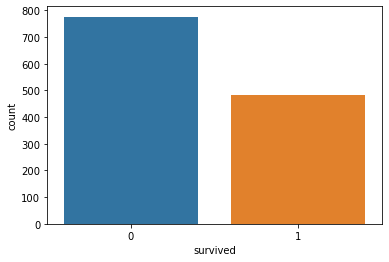

In [28]:

sns.countplot(data["survived"])

In [29]:
x=data.drop(["survived"],axis=1)
y=data["survived"]

In [30]:
# ensemble-- single data multiple algo
from sklearn.linear_model import LogisticRegression
cl=LogisticRegression()

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtf=DecisionTreeClassifier()

In [32]:
from sklearn import svm
svc_m=svm.SVC()

In [33]:
#VotingClassifier(estimators, voting=’hard’, weights=None, n_jobs=None, flatten_transform=True)
from sklearn.ensemble import VotingClassifier

In [34]:
vot=VotingClassifier([('DT', dtf),('svm',svc_m),('LOGIS',cl)])

In [35]:
vot.fit(x,y)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('DT', DecisionTreeClassifier()), ('svm', SVC()),
                             ('LOGIS', LogisticRegression())])

In [36]:
vot.score(x,y)

0.8782816229116945

In [37]:
# ensemble bagging technique
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag = BaggingClassifier(DecisionTreeClassifier(),
                           max_samples=0.5, max_features=0.5)

In [38]:
bag.fit(x,y)
bag.score(x,y)

0.8719172633253779

In [39]:
from sklearn.ensemble import RandomForestClassifier

from  sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)
model=RandomForestClassifier()

In [41]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [42]:
y_pred=model.predict(x_test)

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [44]:
#confusion matrix
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[258  58]
 [ 54 133]]
0.7773359840954275
